# **Data Pre-processing**

## **Import Libraries**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score, auc, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Load Dataset**

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/Global.csv')
data = pd.read_csv('/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Datasets/Global_cleaned.csv')
data.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34393.0,24.0,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,247547.0,3:URLLC
1,727022.0,250.0,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,350131.0,3:URLLC
2,693697.0,1959.0,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,100319.0,3:URLLC
3,22844.0,14.0,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,231497.0,3:URLLC
4,36309.0,7.0,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,197655.0,3:URLLC


In [ ]:
data_backup = data
data_backup

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05,3:URLLC
1,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05,3:URLLC
2,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05,3:URLLC
3,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05,3:URLLC
4,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05,3:URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC
9896,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC
9897,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC
9898,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC


## **Define X and y**

In [ ]:
X = data.drop(columns=['slice Type'])
X

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
0,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05
1,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05
2,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,142.035370,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05
3,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05
4,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,5.111705,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,2.019412,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06
9896,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,2.029394,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06
9897,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,2.037339,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06
9898,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.797084,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06


In [ ]:
features = X.columns.tolist()
features

['X',
 'Seq',
 'Dur',
 'RunTime',
 'Mean',
 'Sum',
 'Min',
 'Max',
 'sTos',
 'dTos',
 'sTtl',
 'dTtl',
 'sHops',
 'dHops',
 'TotPkts',
 'SrcPkts',
 'DstPkts',
 'TotBytes',
 'SrcBytes',
 'DstBytes',
 'Offset',
 'sMeanPktSz',
 'dMeanPktSz',
 'Load',
 'SrcLoad',
 'DstLoad',
 'Loss',
 'SrcLoss',
 'DstLoss',
 'pLoss',
 'SrcGap',
 'DstGap',
 'Rate',
 'SrcRate',
 'DstRate',
 'SrcWin',
 'DstWin',
 'SrcTCPBase',
 'DstTCPBase',
 'TcpRtt',
 'SynAck',
 'AckDat',
 'UniqueID']

In [ ]:
y = data['slice Type']
y

0       3
1       3
2       3
3       3
4       3
       ..
9895    2
9896    2
9897    2
9898    2
9899    2
Name: slice Type, Length: 9900, dtype: int64

In [ ]:
np.unique(y)

array([1, 2, 3])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
9789,664063.816584,2333.956002,1.909499,1.906140,1.904911,1.903984,1.904292,1.905542,0.0,0.0,...,1.576117,2.099850,64128.0,65024.0,2.495714e+09,2.936313e+08,0.014995,0.001868,0.014342,2.164800e+06
7263,447462.160284,1324.999374,2.992250,1.956493,3.280499,2.137423,2.731039,2.663139,0.0,0.0,...,1.891107,1.648011,64256.0,65024.0,2.043686e+09,1.618366e+09,0.151935,0.133785,0.027020,1.028606e+06
2932,236063.418954,8202.246354,4.737295,4.477248,4.835465,4.591553,4.862110,3.644770,0.0,0.0,...,6.307335,29.118550,56960.0,64768.0,8.507672e+08,5.466176e+08,0.047971,0.020919,0.026403,1.098296e+06
9786,664062.237907,2329.564234,1.913800,1.912304,1.913908,1.913048,1.912570,1.914645,0.0,0.0,...,1.567791,2.091048,64128.0,65024.0,2.495714e+09,2.936313e+08,0.014001,0.001637,0.012520,2.364825e+06
2270,119646.416871,5487.642188,4.935297,3.721782,3.651930,4.663535,4.554954,4.704071,0.0,0.0,...,10.956757,29.675869,56960.0,64896.0,8.507672e+08,5.466176e+08,0.043624,0.020918,0.025331,7.481369e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,637842.392373,25324.347257,0.323884,0.336725,0.325118,0.310569,0.338634,0.300003,0.0,0.0,...,28.170875,27.412806,56704.0,64896.0,2.542816e+09,3.847444e+09,0.018744,0.007810,0.027104,1.350396e+06
5191,621174.080519,18814.644336,0.249412,0.258637,0.311403,0.341875,0.244438,0.297379,0.0,0.0,...,21.678560,26.217586,56448.0,64768.0,1.845250e+09,4.388114e+08,0.021797,0.002245,0.020035,1.278613e+06
5390,613094.503112,17298.677915,0.356897,0.532837,0.374227,0.545199,0.484583,0.700138,0.0,0.0,...,22.229216,18.815246,56192.0,64768.0,1.903045e+09,5.429505e+08,0.030092,0.001415,0.029700,1.156060e+06
860,526086.000000,5976.000000,1.047937,1.047937,1.047937,1.047937,1.047937,1.047937,0.0,0.0,...,0.954256,0.954256,512.0,64240.0,7.061805e+08,2.905999e+09,0.002085,0.002085,0.000000,2.207923e+06


In [ ]:
X_test

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
8432,455246.906287,265.659442,4.780376,4.212715,3.007824,4.366963,4.793196,2.944966,0.0,0.0,...,1.771186,1.346425,64256.0,65024.0,5.028190e+08,7.974013e+08,0.560520,0.367769,0.034546,2.250580e+05
5680,636903.010804,25257.663842,0.253301,0.285364,0.293151,0.190814,0.266477,0.281532,0.0,0.0,...,33.262600,38.289493,56704.0,64896.0,2.542816e+09,3.847444e+09,0.017184,0.001470,0.017491,2.087644e+06
4767,636913.763158,25267.499520,0.177227,0.177840,0.177977,0.177295,0.181568,0.178558,0.0,0.0,...,34.998405,50.872519,56704.0,64896.0,1.947928e+09,4.287946e+09,0.022420,0.001604,0.019408,3.769031e+05
9218,660539.880742,1962.659257,2.040534,1.933205,2.045966,1.909115,2.005403,2.013842,0.0,0.0,...,1.750682,2.250765,64128.0,65024.0,3.522979e+09,7.687038e+08,0.014926,0.001640,0.013470,1.276085e+06
621,726791.000000,61.000000,4.999586,4.999586,4.999586,4.999586,4.999586,4.999586,0.0,0.0,...,4.000331,3.000248,91648.0,68608.0,5.433417e+08,3.940738e+09,0.138367,0.105134,0.033233,3.117260e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,664611.336644,2619.439858,1.866206,1.883590,1.868661,1.881472,1.863862,1.867791,0.0,0.0,...,1.598268,2.140264,64128.0,65024.0,4.218550e+08,1.770455e+09,0.017556,0.001885,0.019715,3.526948e+05
9155,455234.910255,194.612521,3.891595,3.613938,3.326338,3.337980,3.980882,3.215810,0.0,0.0,...,2.306333,1.497726,64256.0,64896.0,6.010938e+08,3.265196e+09,1.001778,0.405318,0.026356,1.272696e+06
594,34817.000000,7.000000,4.498744,4.498744,4.498744,4.498744,4.498744,4.498744,0.0,0.0,...,4.223401,6.223959,4094.0,5549.0,1.093752e+09,3.441352e+09,0.000000,0.000000,0.000000,9.435900e+04
5563,636911.618669,25259.810066,0.204607,0.219529,0.187462,0.190487,0.218758,0.207756,0.0,0.0,...,38.116638,44.712333,56704.0,64896.0,2.542816e+09,3.847444e+09,0.019125,0.001697,0.017450,2.071909e+06


In [ ]:
y_train

9789    2
7263    2
2932    1
9786    2
2270    1
       ..
5734    1
5191    1
5390    1
860     2
7270    2
Name: slice Type, Length: 8910, dtype: int64

In [ ]:
y_test

8432    2
5680    1
4767    1
9218    2
621     2
       ..
8640    2
9155    2
594     2
5563    1
3434    1
Name: slice Type, Length: 990, dtype: int64

# **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_RFC = model_RFC.predict(X_test)

In [ ]:
accuracy_RFC = accuracy_score(y_test, y_pred_RFC)
print(f"Accuracy: {accuracy_RFC:.2f}")

Accuracy: 1.00


In [ ]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       589
           2       0.99      1.00      1.00       328
           3       1.00      0.97      0.99        73

    accuracy                           1.00       990
   macro avg       1.00      0.99      0.99       990
weighted avg       1.00      1.00      1.00       990



In [ ]:
print(confusion_matrix(y_test, y_pred_RFC))

[[588   1   0]
 [  0 328   0]
 [  1   1  71]]


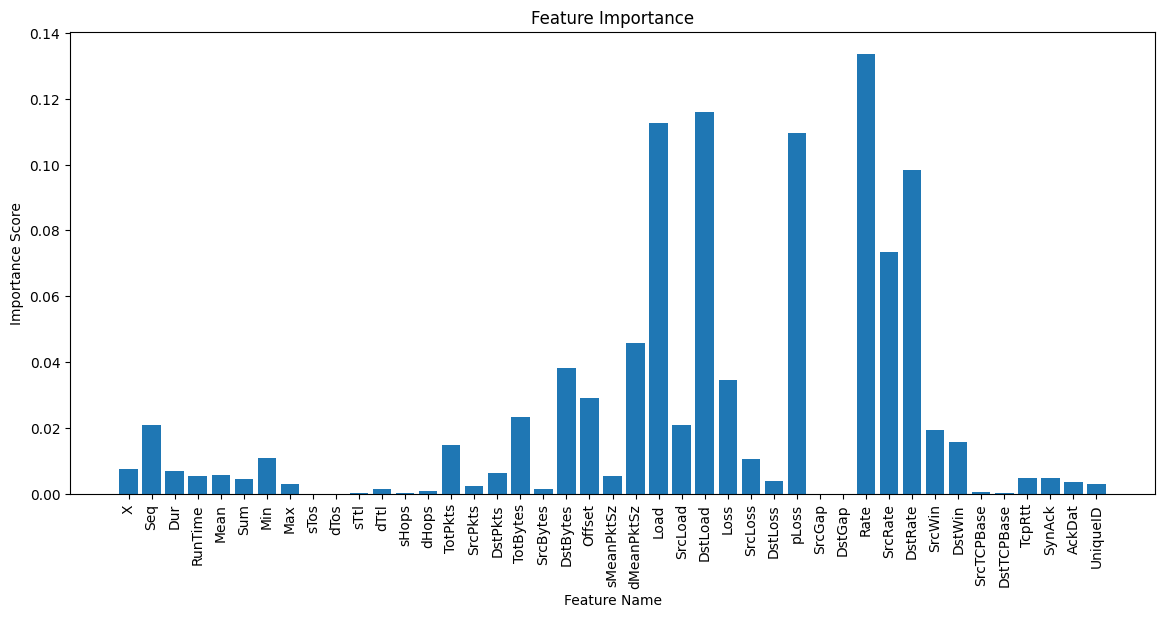

In [ ]:
# Feature Importance
feature_importance = model_RFC.feature_importances_
# features = np.arange(len(feature_importance))

# plt.figure(figsize=(len(feature_importance), 10))
plt.figure(figsize=(14, 6))
plt.bar(features, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

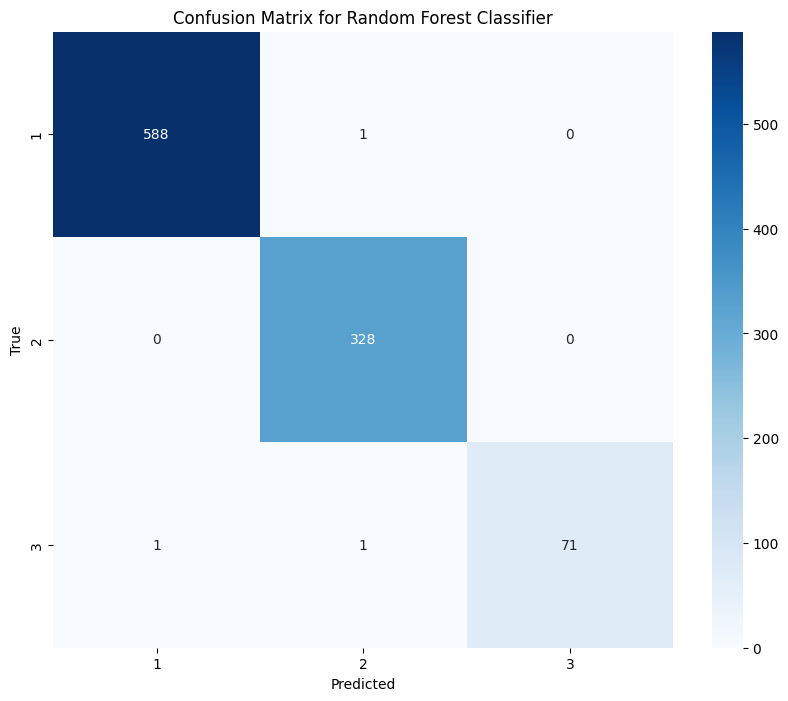

In [ ]:
# Confusion Matrix
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_RFC, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_RFC = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_RFC = X_test_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_RFC.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_RFC = pd.Series(y_pred_RFC, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_RFC['Actual_Slice_Type'] = y_test
X_test_with_predictions_RFC['Predicted_Slice_Type'] = y_pred_RFC

In [ ]:
X_test_column_names

['X',
 'Seq',
 'Dur',
 'RunTime',
 'Mean',
 'Sum',
 'Min',
 'Max',
 'sTos',
 'dTos',
 'sTtl',
 'dTtl',
 'sHops',
 'dHops',
 'TotPkts',
 'SrcPkts',
 'DstPkts',
 'TotBytes',
 'SrcBytes',
 'DstBytes',
 'Offset',
 'sMeanPktSz',
 'dMeanPktSz',
 'Load',
 'SrcLoad',
 'DstLoad',
 'Loss',
 'SrcLoss',
 'DstLoss',
 'pLoss',
 'SrcGap',
 'DstGap',
 'Rate',
 'SrcRate',
 'DstRate',
 'SrcWin',
 'DstWin',
 'SrcTCPBase',
 'DstTCPBase',
 'TcpRtt',
 'SynAck',
 'AckDat',
 'UniqueID']

In [ ]:
X_test_with_predictions_RFC.head(20)

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,Actual_Slice_Type,Predicted_Slice_Type
0,455246.906287,265.659442,4.780376,4.212715,3.007824,4.366963,4.793196,2.944966,0.0,0.0,...,64256.0,65024.0,5.028190e+08,7.974013e+08,0.560520,0.367769,0.034546,2.250580e+05,2,2
1,636903.010804,25257.663842,0.253301,0.285364,0.293151,0.190814,0.266477,0.281532,0.0,0.0,...,56704.0,64896.0,2.542816e+09,3.847444e+09,0.017184,0.001470,0.017491,2.087644e+06,1,1
2,636913.763158,25267.499520,0.177227,0.177840,0.177977,0.177295,0.181568,0.178558,0.0,0.0,...,56704.0,64896.0,1.947928e+09,4.287946e+09,0.022420,0.001604,0.019408,3.769031e+05,1,1
3,660539.880742,1962.659257,2.040534,1.933205,2.045966,1.909115,2.005403,2.013842,0.0,0.0,...,64128.0,65024.0,3.522979e+09,7.687038e+08,0.014926,0.001640,0.013470,1.276085e+06,2,2
4,726791.000000,61.000000,4.999586,4.999586,4.999586,4.999586,4.999586,4.999586,0.0,0.0,...,91648.0,68608.0,5.433417e+08,3.940738e+09,0.138367,0.105134,0.033233,3.117260e+05,2,2
5,637292.644821,26373.962141,3.973801,2.412318,1.728140,3.006734,3.773497,4.640954,0.0,0.0,...,56704.0,64640.0,3.025160e+09,2.052664e+09,0.030688,0.013300,0.015763,2.160506e+06,1,1
6,455164.409119,185.145517,3.459985,3.535328,3.330325,3.264566,3.698071,3.099247,0.0,0.0,...,64256.0,65024.0,3.958828e+09,9.675108e+08,0.033246,0.001336,0.035282,2.055851e+06,2,2
7,615909.297427,17998.017745,0.296050,0.346868,0.283271,0.331948,0.284098,0.300357,0.0,0.0,...,56832.0,64768.0,8.256066e+08,1.984643e+08,0.028447,0.001514,0.029245,2.206492e+06,1,1
8,38090.093865,7.000000,4.523248,4.582574,4.476724,4.543265,4.557378,4.559856,0.0,0.0,...,4094.0,5549.0,1.094831e+09,3.442058e+09,0.000000,0.000000,0.000000,2.186399e+06,2,2
9,455183.886427,208.639914,4.049667,3.764626,3.694967,3.998357,4.005673,3.795602,0.0,0.0,...,64256.0,64896.0,1.202037e+09,1.485176e+08,0.050970,0.001425,0.051342,2.358707e+06,2,2


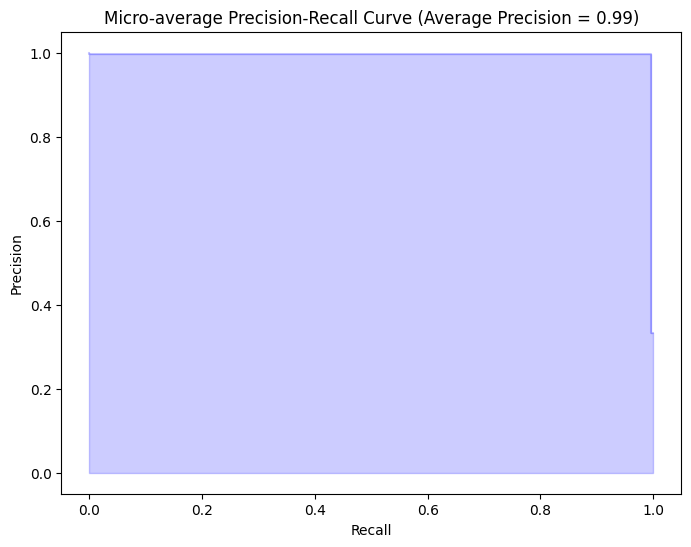

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_RFC_bin = label_binarize(y_pred_RFC, classes=np.unique(y_pred_RFC))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_RFC_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_RFC_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_RFC_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_RFC_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

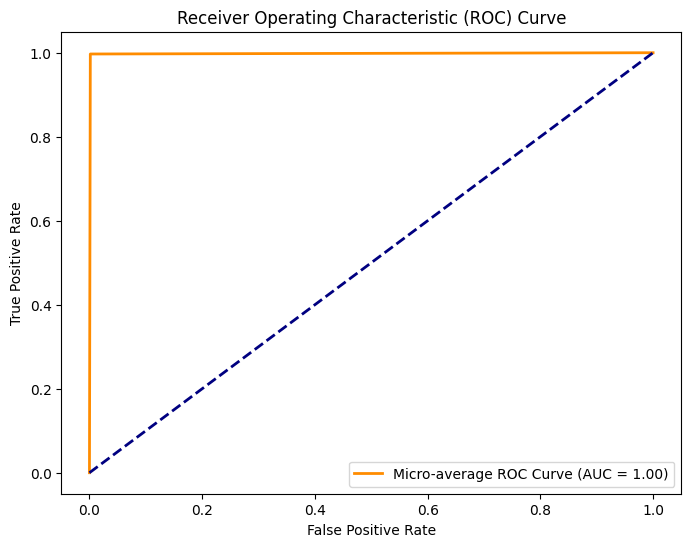

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_RFC_bin = label_binarize(y_pred_RFC, classes=np.unique(y_pred_RFC))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_RFC_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_RFC_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_LR = model_LR.predict(X_test)

In [ ]:
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f'Accuracy: {accuracy_LR}')

Accuracy: 0.7808080808080808


In [ ]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

      1:eMBB       0.84      0.83      0.83       589
      2:mMTC       0.69      0.88      0.77       328
     3:URLLC       0.00      0.00      0.00        73

    accuracy                           0.78       990
   macro avg       0.51      0.57      0.54       990
weighted avg       0.73      0.78      0.75       990



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test, y_pred_LR))

[[486 103   0]
 [ 41 287   0]
 [ 50  23   0]]


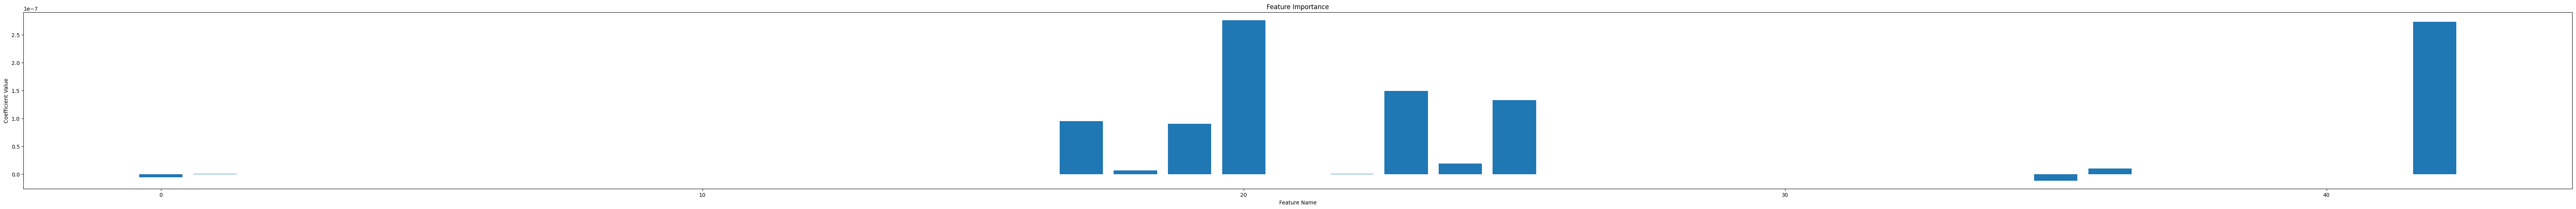

In [ ]:
# Feature Importance
feature_importance = model_LR.coef_[0]
# features = np.arange(len(feature_importance))

plt.figure(figsize=(2 * len(features), 6))
plt.bar(features, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Coefficient Value')
plt.show()

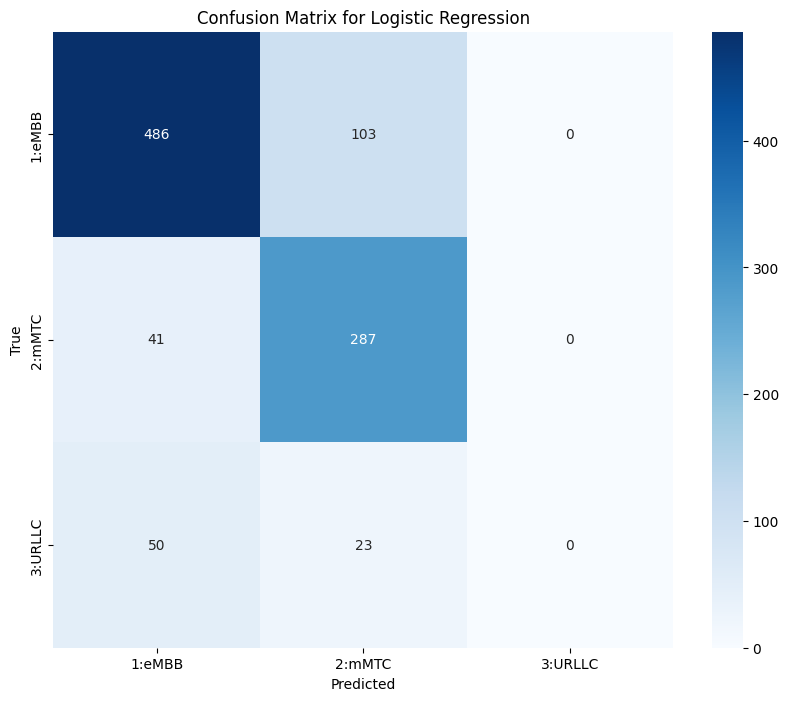

In [ ]:
# Confusion Matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_LR, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_LR = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_LR = X_test_df_LR.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_LR.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_LR = pd.Series(y_pred_LR, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_LR['Actual_Slice_Type'] = y_test
X_test_with_predictions_LR['Predicted_Slice_Type'] = y_pred_LR

In [ ]:
X_test_with_predictions_LR.head(20)

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,Actual_Slice_Type,Predicted_Slice_Type
0,455246.906287,265.659442,4.780376,4.212715,3.007824,4.366963,4.793196,2.944966,0.0,0.0,...,64256.0,65024.0,5.028190e+08,7.974013e+08,0.560520,0.367769,0.034546,2.250580e+05,2:mMTC,2:mMTC
1,636903.010804,25257.663842,0.253301,0.285364,0.293151,0.190814,0.266477,0.281532,0.0,0.0,...,56704.0,64896.0,2.542816e+09,3.847444e+09,0.017184,0.001470,0.017491,2.087644e+06,1:eMBB,1:eMBB
2,636913.763158,25267.499520,0.177227,0.177840,0.177977,0.177295,0.181568,0.178558,0.0,0.0,...,56704.0,64896.0,1.947928e+09,4.287946e+09,0.022420,0.001604,0.019408,3.769031e+05,1:eMBB,1:eMBB
3,660539.880742,1962.659257,2.040534,1.933205,2.045966,1.909115,2.005403,2.013842,0.0,0.0,...,64128.0,65024.0,3.522979e+09,7.687038e+08,0.014926,0.001640,0.013470,1.276085e+06,2:mMTC,2:mMTC
4,726791.000000,61.000000,4.999586,4.999586,4.999586,4.999586,4.999586,4.999586,0.0,0.0,...,91648.0,68608.0,5.433417e+08,3.940738e+09,0.138367,0.105134,0.033233,3.117260e+05,2:mMTC,2:mMTC
5,637292.644821,26373.962141,3.973801,2.412318,1.728140,3.006734,3.773497,4.640954,0.0,0.0,...,56704.0,64640.0,3.025160e+09,2.052664e+09,0.030688,0.013300,0.015763,2.160506e+06,1:eMBB,1:eMBB
6,455164.409119,185.145517,3.459985,3.535328,3.330325,3.264566,3.698071,3.099247,0.0,0.0,...,64256.0,65024.0,3.958828e+09,9.675108e+08,0.033246,0.001336,0.035282,2.055851e+06,2:mMTC,2:mMTC
7,615909.297427,17998.017745,0.296050,0.346868,0.283271,0.331948,0.284098,0.300357,0.0,0.0,...,56832.0,64768.0,8.256066e+08,1.984643e+08,0.028447,0.001514,0.029245,2.206492e+06,1:eMBB,1:eMBB
8,38090.093865,7.000000,4.523248,4.582574,4.476724,4.543265,4.557378,4.559856,0.0,0.0,...,4094.0,5549.0,1.094831e+09,3.442058e+09,0.000000,0.000000,0.000000,2.186399e+06,2:mMTC,2:mMTC
9,455183.886427,208.639914,4.049667,3.764626,3.694967,3.998357,4.005673,3.795602,0.0,0.0,...,64256.0,64896.0,1.202037e+09,1.485176e+08,0.050970,0.001425,0.051342,2.358707e+06,2:mMTC,2:mMTC


In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_LR_bin = label_binarize(y_pred_LR, classes=np.unique(y_pred_LR))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_LR_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_LR_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_LR_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_LR_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_LR_bin = label_binarize(y_pred_LR, classes=np.unique(y_pred_LR))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_LR_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_LR_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = model_NB.predict(X_test)

In [ ]:
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f'Accuracy: {accuracy_NB}')

Accuracy: 0.8595959595959596


In [ ]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

      1:eMBB       0.95      0.89      0.92       589
      2:mMTC       0.74      0.98      0.84       328
     3:URLLC       0.75      0.04      0.08        73

    accuracy                           0.86       990
   macro avg       0.81      0.64      0.61       990
weighted avg       0.87      0.86      0.83       990



In [ ]:
print(confusion_matrix(y_test, y_pred_NB))

[[526  63   0]
 [  5 322   1]
 [ 20  50   3]]


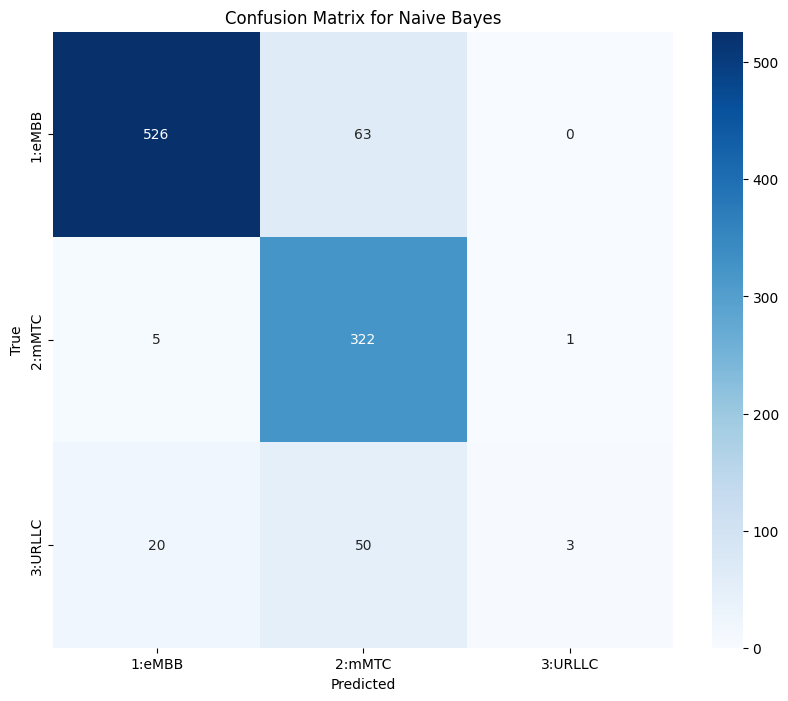

In [ ]:
# Confusion Matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_NB, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_NB = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_NB = X_test_df_NB.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_NB.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_NB = pd.Series(y_pred_NB, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_NB['Actual_Slice_Type'] = y_test
X_test_with_predictions_NB['Predicted_Slice_Type'] = y_pred_NB

In [ ]:
X_test_with_predictions_NB.head(20)

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,Actual_Slice_Type,Predicted_Slice_Type
0,455246.906287,265.659442,4.780376,4.212715,3.007824,4.366963,4.793196,2.944966,0.0,0.0,...,64256.0,65024.0,5.028190e+08,7.974013e+08,0.560520,0.367769,0.034546,2.250580e+05,2:mMTC,2:mMTC
1,636903.010804,25257.663842,0.253301,0.285364,0.293151,0.190814,0.266477,0.281532,0.0,0.0,...,56704.0,64896.0,2.542816e+09,3.847444e+09,0.017184,0.001470,0.017491,2.087644e+06,1:eMBB,1:eMBB
2,636913.763158,25267.499520,0.177227,0.177840,0.177977,0.177295,0.181568,0.178558,0.0,0.0,...,56704.0,64896.0,1.947928e+09,4.287946e+09,0.022420,0.001604,0.019408,3.769031e+05,1:eMBB,1:eMBB
3,660539.880742,1962.659257,2.040534,1.933205,2.045966,1.909115,2.005403,2.013842,0.0,0.0,...,64128.0,65024.0,3.522979e+09,7.687038e+08,0.014926,0.001640,0.013470,1.276085e+06,2:mMTC,2:mMTC
4,726791.000000,61.000000,4.999586,4.999586,4.999586,4.999586,4.999586,4.999586,0.0,0.0,...,91648.0,68608.0,5.433417e+08,3.940738e+09,0.138367,0.105134,0.033233,3.117260e+05,2:mMTC,2:mMTC
5,637292.644821,26373.962141,3.973801,2.412318,1.728140,3.006734,3.773497,4.640954,0.0,0.0,...,56704.0,64640.0,3.025160e+09,2.052664e+09,0.030688,0.013300,0.015763,2.160506e+06,1:eMBB,1:eMBB
6,455164.409119,185.145517,3.459985,3.535328,3.330325,3.264566,3.698071,3.099247,0.0,0.0,...,64256.0,65024.0,3.958828e+09,9.675108e+08,0.033246,0.001336,0.035282,2.055851e+06,2:mMTC,2:mMTC
7,615909.297427,17998.017745,0.296050,0.346868,0.283271,0.331948,0.284098,0.300357,0.0,0.0,...,56832.0,64768.0,8.256066e+08,1.984643e+08,0.028447,0.001514,0.029245,2.206492e+06,1:eMBB,1:eMBB
8,38090.093865,7.000000,4.523248,4.582574,4.476724,4.543265,4.557378,4.559856,0.0,0.0,...,4094.0,5549.0,1.094831e+09,3.442058e+09,0.000000,0.000000,0.000000,2.186399e+06,2:mMTC,2:mMTC
9,455183.886427,208.639914,4.049667,3.764626,3.694967,3.998357,4.005673,3.795602,0.0,0.0,...,64256.0,64896.0,1.202037e+09,1.485176e+08,0.050970,0.001425,0.051342,2.358707e+06,2:mMTC,2:mMTC


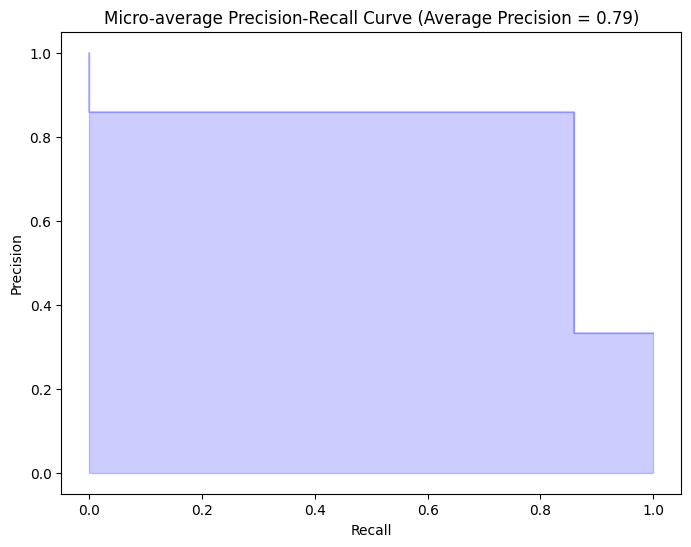

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_NB_bin = label_binarize(y_pred_NB, classes=np.unique(y_pred_NB))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_NB_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_NB_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_NB_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_NB_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

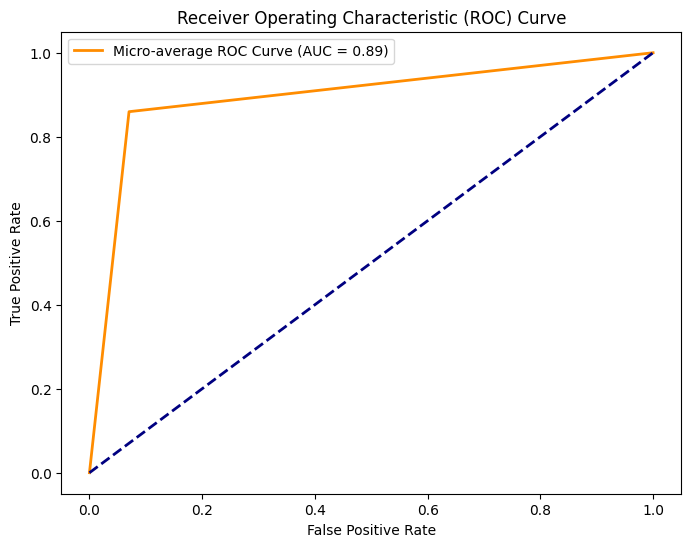

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_NB_bin = label_binarize(y_pred_NB, classes=np.unique(y_pred_NB))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_NB_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_NB_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Choose the number of neighbors (e.g., 3, 5, 7)
k = 5
model_KNN = KNeighborsClassifier(n_neighbors=k)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_KNN = model_KNN.predict(X_test)

In [ ]:
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print(f'Accuracy: {accuracy_KNN}')

Accuracy: 0.9525252525252526


In [ ]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

      1:eMBB       0.99      1.00      0.99       589
      2:mMTC       0.90      0.98      0.94       328
     3:URLLC       0.81      0.48      0.60        73

    accuracy                           0.95       990
   macro avg       0.90      0.82      0.85       990
weighted avg       0.95      0.95      0.95       990



In [ ]:
print(confusion_matrix(y_test, y_pred_KNN))

[[587   0   2]
 [  1 321   6]
 [  4  34  35]]


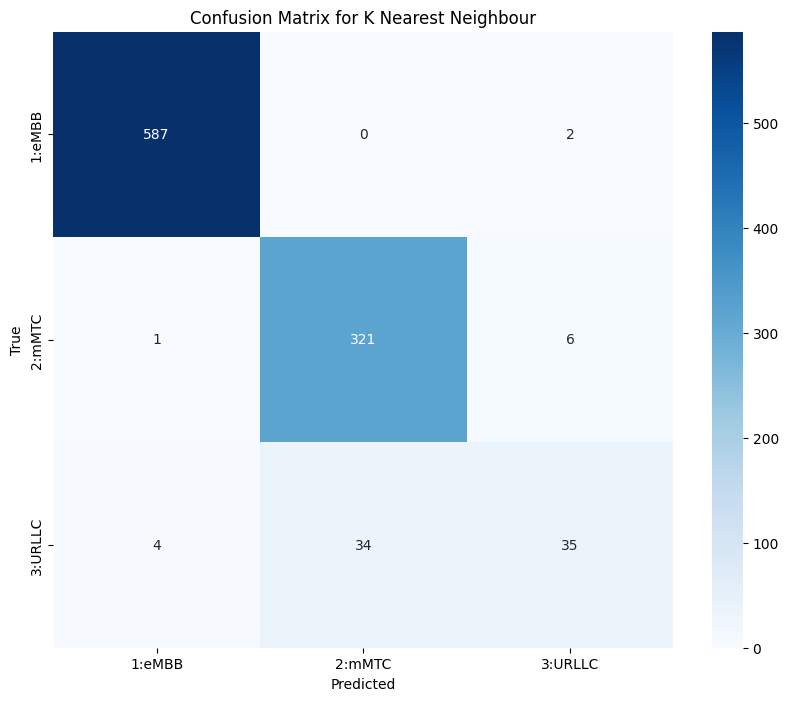

In [ ]:
# Confusion Matrix
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_KNN, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for K Nearest Neighbour')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_KNN = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_KNN = X_test_df_KNN.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_KNN.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_KNN = pd.Series(y_pred_KNN, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_KNN['Actual_Slice_Type'] = y_test
X_test_with_predictions_KNN['Predicted_Slice_Type'] = y_pred_KNN

In [ ]:
X_test_with_predictions_KNN.head(20)

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,Actual_Slice_Type,Predicted_Slice_Type
0,455246.906287,265.659442,4.780376,4.212715,3.007824,4.366963,4.793196,2.944966,0.0,0.0,...,64256.0,65024.0,5.028190e+08,7.974013e+08,0.560520,0.367769,0.034546,2.250580e+05,2:mMTC,2:mMTC
1,636903.010804,25257.663842,0.253301,0.285364,0.293151,0.190814,0.266477,0.281532,0.0,0.0,...,56704.0,64896.0,2.542816e+09,3.847444e+09,0.017184,0.001470,0.017491,2.087644e+06,1:eMBB,1:eMBB
2,636913.763158,25267.499520,0.177227,0.177840,0.177977,0.177295,0.181568,0.178558,0.0,0.0,...,56704.0,64896.0,1.947928e+09,4.287946e+09,0.022420,0.001604,0.019408,3.769031e+05,1:eMBB,1:eMBB
3,660539.880742,1962.659257,2.040534,1.933205,2.045966,1.909115,2.005403,2.013842,0.0,0.0,...,64128.0,65024.0,3.522979e+09,7.687038e+08,0.014926,0.001640,0.013470,1.276085e+06,2:mMTC,2:mMTC
4,726791.000000,61.000000,4.999586,4.999586,4.999586,4.999586,4.999586,4.999586,0.0,0.0,...,91648.0,68608.0,5.433417e+08,3.940738e+09,0.138367,0.105134,0.033233,3.117260e+05,2:mMTC,2:mMTC
5,637292.644821,26373.962141,3.973801,2.412318,1.728140,3.006734,3.773497,4.640954,0.0,0.0,...,56704.0,64640.0,3.025160e+09,2.052664e+09,0.030688,0.013300,0.015763,2.160506e+06,1:eMBB,1:eMBB
6,455164.409119,185.145517,3.459985,3.535328,3.330325,3.264566,3.698071,3.099247,0.0,0.0,...,64256.0,65024.0,3.958828e+09,9.675108e+08,0.033246,0.001336,0.035282,2.055851e+06,2:mMTC,2:mMTC
7,615909.297427,17998.017745,0.296050,0.346868,0.283271,0.331948,0.284098,0.300357,0.0,0.0,...,56832.0,64768.0,8.256066e+08,1.984643e+08,0.028447,0.001514,0.029245,2.206492e+06,1:eMBB,1:eMBB
8,38090.093865,7.000000,4.523248,4.582574,4.476724,4.543265,4.557378,4.559856,0.0,0.0,...,4094.0,5549.0,1.094831e+09,3.442058e+09,0.000000,0.000000,0.000000,2.186399e+06,2:mMTC,2:mMTC
9,455183.886427,208.639914,4.049667,3.764626,3.694967,3.998357,4.005673,3.795602,0.0,0.0,...,64256.0,64896.0,1.202037e+09,1.485176e+08,0.050970,0.001425,0.051342,2.358707e+06,2:mMTC,2:mMTC


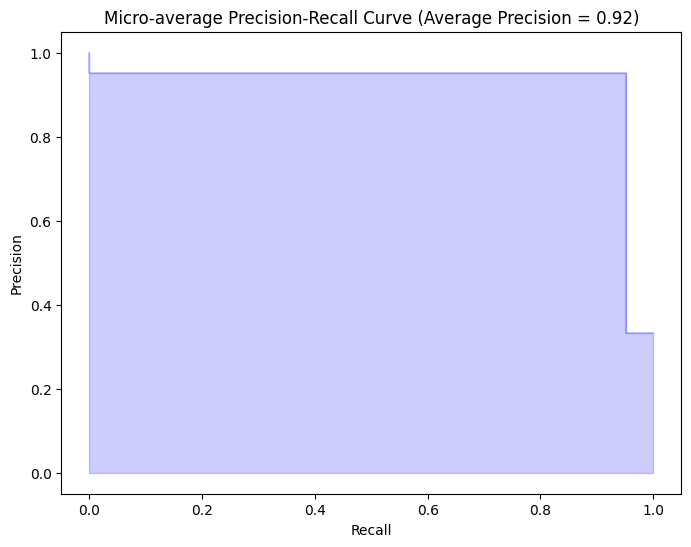

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_KNN_bin = label_binarize(y_pred_KNN, classes=np.unique(y_pred_KNN))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_KNN_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_KNN_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_KNN_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_KNN_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

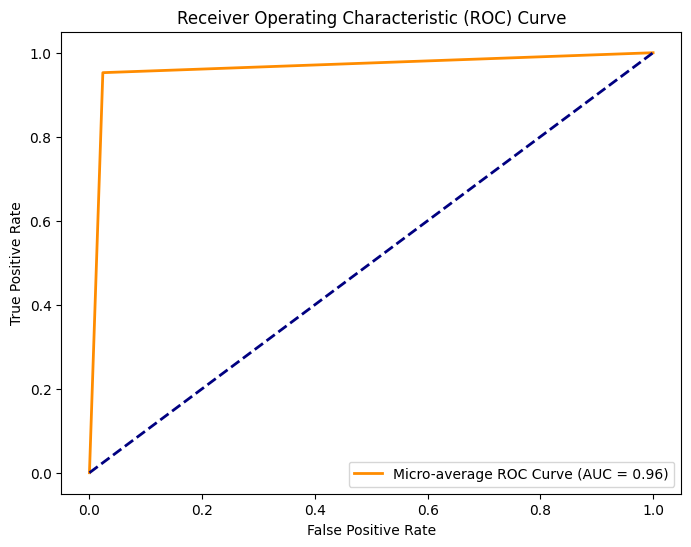

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_KNN_bin = label_binarize(y_pred_KNN, classes=np.unique(y_pred_KNN))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_KNN_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_KNN_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_DT = model_DT.predict(X_test)

In [ ]:
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'Accuracy: {accuracy_DT}')

Accuracy: 0.998989898989899


In [ ]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

      1:eMBB       1.00      1.00      1.00       589
      2:mMTC       1.00      1.00      1.00       328
     3:URLLC       1.00      1.00      1.00        73

    accuracy                           1.00       990
   macro avg       1.00      1.00      1.00       990
weighted avg       1.00      1.00      1.00       990



In [ ]:
print(confusion_matrix(y_test, y_pred_DT))

[[588   1   0]
 [  0 328   0]
 [  0   0  73]]


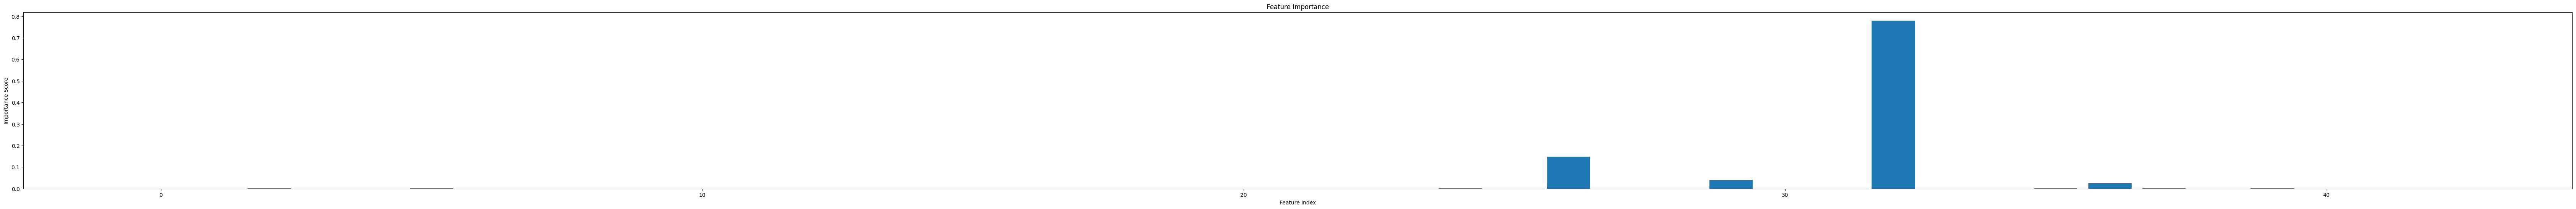

In [ ]:
# Feature Importance
feature_importance = model_DT.feature_importances_
# features = np.arange(len(feature_importance))

plt.figure(figsize=(2 * len(features), 6))
plt.bar(features, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.show()

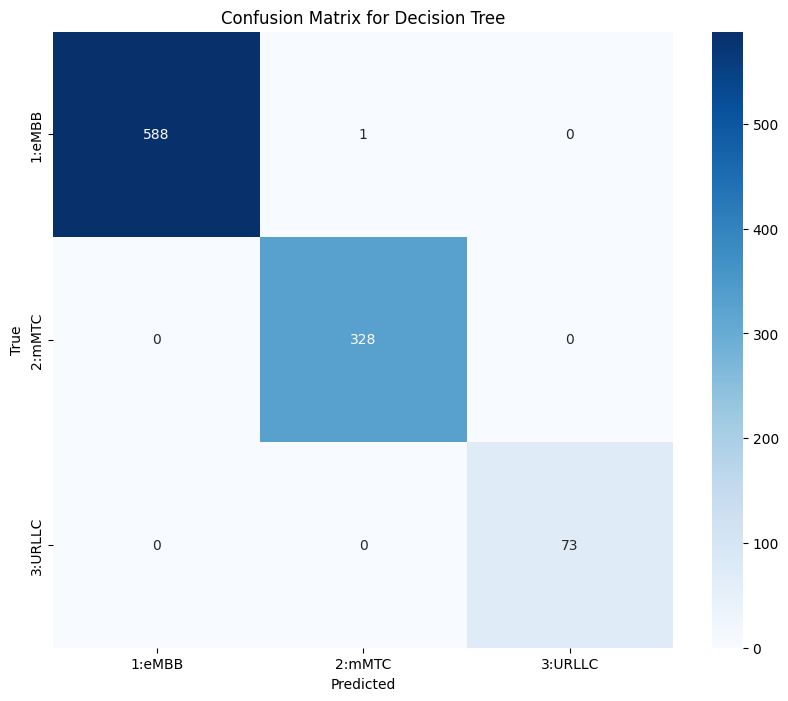

In [ ]:
# Confusion Matrix
cm_DT = confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_DT, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_DT = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_DT = X_test_df_DT.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_DT.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_DT = pd.Series(y_pred_DT, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_DT['Actual_Slice_Type'] = y_test
X_test_with_predictions_DT['Predicted_Slice_Type'] = y_pred_DT

In [ ]:
X_test_with_predictions_DT.head(20)

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,Actual_Slice_Type,Predicted_Slice_Type
0,455246.906287,265.659442,4.780376,4.212715,3.007824,4.366963,4.793196,2.944966,0.0,0.0,...,64256.0,65024.0,5.028190e+08,7.974013e+08,0.560520,0.367769,0.034546,2.250580e+05,2:mMTC,2:mMTC
1,636903.010804,25257.663842,0.253301,0.285364,0.293151,0.190814,0.266477,0.281532,0.0,0.0,...,56704.0,64896.0,2.542816e+09,3.847444e+09,0.017184,0.001470,0.017491,2.087644e+06,1:eMBB,1:eMBB
2,636913.763158,25267.499520,0.177227,0.177840,0.177977,0.177295,0.181568,0.178558,0.0,0.0,...,56704.0,64896.0,1.947928e+09,4.287946e+09,0.022420,0.001604,0.019408,3.769031e+05,1:eMBB,1:eMBB
3,660539.880742,1962.659257,2.040534,1.933205,2.045966,1.909115,2.005403,2.013842,0.0,0.0,...,64128.0,65024.0,3.522979e+09,7.687038e+08,0.014926,0.001640,0.013470,1.276085e+06,2:mMTC,2:mMTC
4,726791.000000,61.000000,4.999586,4.999586,4.999586,4.999586,4.999586,4.999586,0.0,0.0,...,91648.0,68608.0,5.433417e+08,3.940738e+09,0.138367,0.105134,0.033233,3.117260e+05,2:mMTC,2:mMTC
5,637292.644821,26373.962141,3.973801,2.412318,1.728140,3.006734,3.773497,4.640954,0.0,0.0,...,56704.0,64640.0,3.025160e+09,2.052664e+09,0.030688,0.013300,0.015763,2.160506e+06,1:eMBB,1:eMBB
6,455164.409119,185.145517,3.459985,3.535328,3.330325,3.264566,3.698071,3.099247,0.0,0.0,...,64256.0,65024.0,3.958828e+09,9.675108e+08,0.033246,0.001336,0.035282,2.055851e+06,2:mMTC,2:mMTC
7,615909.297427,17998.017745,0.296050,0.346868,0.283271,0.331948,0.284098,0.300357,0.0,0.0,...,56832.0,64768.0,8.256066e+08,1.984643e+08,0.028447,0.001514,0.029245,2.206492e+06,1:eMBB,1:eMBB
8,38090.093865,7.000000,4.523248,4.582574,4.476724,4.543265,4.557378,4.559856,0.0,0.0,...,4094.0,5549.0,1.094831e+09,3.442058e+09,0.000000,0.000000,0.000000,2.186399e+06,2:mMTC,2:mMTC
9,455183.886427,208.639914,4.049667,3.764626,3.694967,3.998357,4.005673,3.795602,0.0,0.0,...,64256.0,64896.0,1.202037e+09,1.485176e+08,0.050970,0.001425,0.051342,2.358707e+06,2:mMTC,2:mMTC


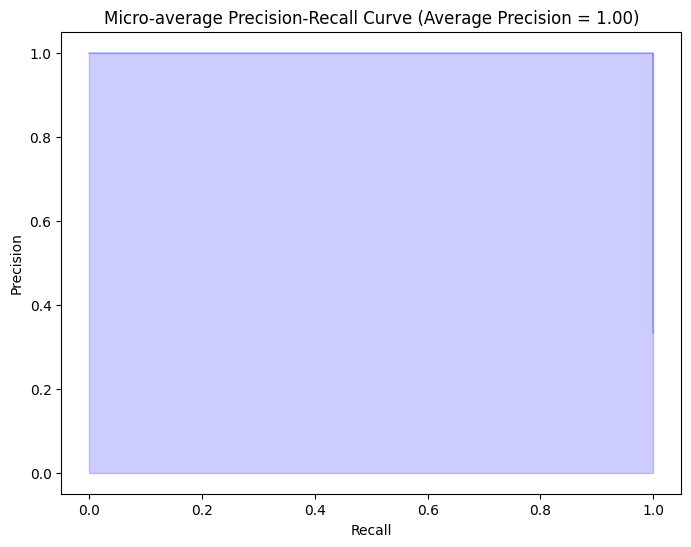

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_DT_bin = label_binarize(y_pred_DT, classes=np.unique(y_pred_DT))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_DT_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_DT_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_DT_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_DT_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

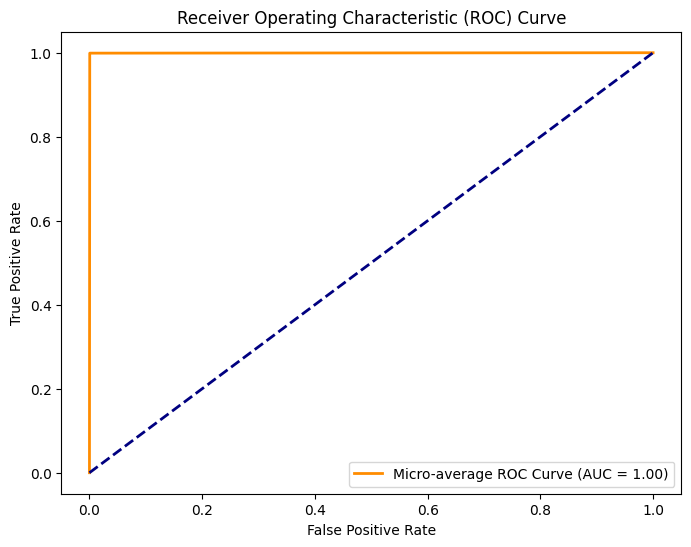

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_DT_bin = label_binarize(y_pred_DT, classes=np.unique(y_pred_DT))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_DT_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_DT_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Types of SVM (linear, polynomial, radial basis function, etc.)
# Here, we use a linear kernel for simplicity
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train, y_train)

In [ ]:
y_pred_SVM = model_SVM.predict(X_test)

In [ ]:
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print(f'Accuracy: {accuracy_SVM}')

In [ ]:
print(classification_report(y_test, y_pred_SVM))

In [ ]:
print(confusion_matrix(y_test, y_pred_SVM))

In [ ]:
# Confusion Matrix
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_SVM, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_SVM = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_SVM = X_test_df_SVM.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_SVM.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred = pd.Series(y_pred_SVM, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_SVM['Actual_Slice_Type'] = y_test
X_test_with_predictions_SVM['Predicted_Slice_Type'] = y_pred_SVM

In [ ]:
X_test_with_predictions_SVM.head(20)

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_SVM_bin = label_binarize(y_pred_SVM, classes=np.unique(y_pred_SVM))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_SVM_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_SVM_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_SVM_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_SVM_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_SVM_bin = label_binarize(y_pred_SVM, classes=np.unique(y_pred_SVM))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_SVM_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_SVM_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **SYNC NOTEBOOKS**

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp11 - Slice_Classification_SupML.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'